In [1]:
import os

# = = = = = = = = = = = = = = =

from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

# = = = = = = = = = = = = = = =

import json

# = = = = = = = = = = = = = = =

import requests

import sys
sys.path.append('./')
from crawler_configuration import get_header, get_proxy

# = = = = = = = = = = = = = = =

import PIL

# = = = = = = = = = = = = = = =

from io import BytesIO

# = = = = = = = = = = = = = = =

from openpyxl.drawing.image import Image

In [2]:
size, quality = 500, '100%'

In [3]:
directory_in = './crawler'

list_file = [file for file in sorted(os.listdir(directory_in)) if file not in ['.DS_Store', '0.null.txt'] and os.path.isfile(f'{directory_in}/{file}')]
file = list_file[0]

file

'crawler_1.xlsx'

In [4]:
wb = load_workbook(f'{directory_in}/{file}')
ws = wb.active

for column in range(1, ws.max_column + 1):
    if ws.cell(1, column).value == 'Json_Src':
        column_src = column
    elif ws.cell(1, column).value == 'Picture':
        column_pic = column

count_remain = ws.max_row - 1

print(f'总数量：{count_remain}')
print()
column_src, get_column_letter(column_src), column_pic, get_column_letter(column_pic)

总数量：10



(40, 'AN', 10, 'J')

In [5]:
crawler_status, crawler_index = False, 2

crawler_status, crawler_index

(False, 2)

In [6]:
src = json.loads(ws.cell(crawler_index, column_src).value).get('0', '')

src

'https://static.dormanproducts.com/images/product/medium/924-212-007.JPG'

In [7]:
src == ''

False

In [8]:
count_retry = 0
while True:
    count_retry += 1
    print(count_retry)
    try:
        resp = requests.get(src,
                            headers=get_header(),
                            proxies=get_proxy(),
                            timeout=(5, 15))

        if resp.status_code == 200:
            break
    except KeyboardInterrupt:
        break
    except:
        continue

resp

1


<Response [200]>

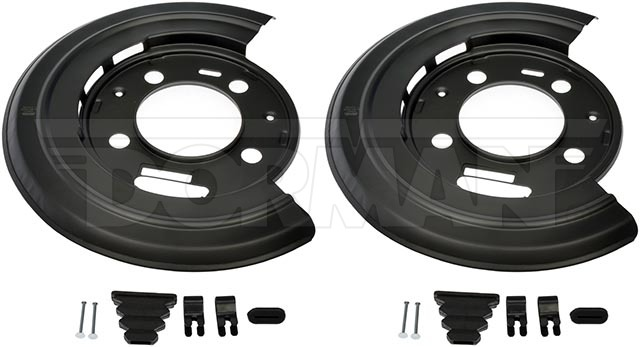

In [9]:
image = PIL.Image.open(BytesIO(resp.content)).convert('RGB')

image

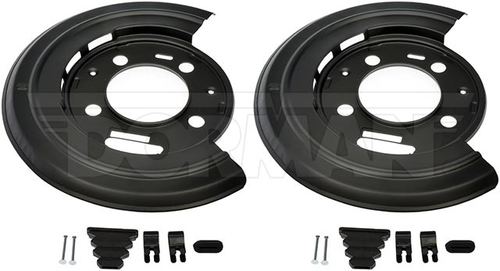

In [10]:
scale = size / max(image.width, image.height)
image = image.resize((int(image.width * scale), int(image.height * scale)), PIL.Image.Resampling.LANCZOS)

image

In [11]:
buffer = BytesIO()
if quality == '100%':
    image.save(buffer, format="PNG")
else:
    image.save(buffer, format="JPEG", quality=int(compress.removesuffix('%')))
buffer.seek(0)

pic = Image(buffer)

pic

In [12]:
ws.add_image(pic, f'{get_column_letter(column_pic)}{crawler_index}')

ws

<Worksheet "Sheet1">

In [13]:
print('输出ing...')
print()
wb.save('./test_pic.xlsx')
print('Done ~')

输出ing...

Done ~
